In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import x_sin, generate_data, lstm_model

In [2]:
LOG_DIR = './ops_logs/x_sin'
TIMESTEPS = 10
RNN_LAYERS = [{'num_units': 10}, {'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 100000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                            model_dir=LOG_DIR)

In [4]:
X, y = generate_data(x_sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=10000)
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Estimator(params=None)

In [8]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

MSE: 72.775338


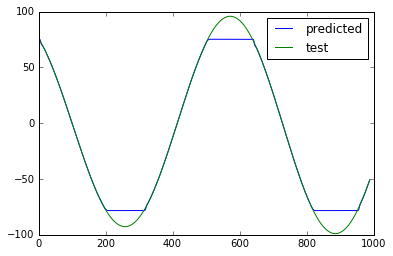

In [9]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])

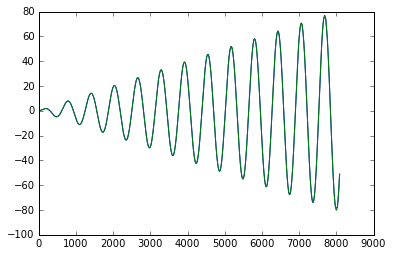

In [10]:
plt.plot(regressor.predict(X['train']))
plt.plot(y['train'])